# 2. Entendimiento de los Datos

In [1]:
## Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Datlas Data
data_datlas = pd.read_excel('./data/data_datlas.xlsx')

In [18]:
# Load Weather Data
# Source: https://www.ncei.noaa.gov/access/past-weather/Monterrey%2C%20Nuevo%20Le%C3%B3n, 
# tomemos la precipitación de Monterrey como si fuera del estado.
data_weather = pd.read_csv('./data/data_weather.csv')
data_weather.head(3)

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,15/03/1977,76.0,91.0,57.0,0.0,NaN,NaN
1,18/03/1977,81.0,NaN,NaN,0.0,NaN,NaN
2,21/03/1977,71.0,NaN,NaN,0.0,NaN,NaN


## 2.1 Contexto de los Datos

In [4]:
data_datlas.head()

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
0,D00001,22.768507,-102.567896,98000,*EP 2 Boulevard Adolfo López Mateos,CERRADA DE CASA BLANCA,COLISION Y/O VUELCO,Camión,BLANCO,2016,Bajo,NaN,2018,1,11,JUEVES,15,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,2018-01-11
1,D00002,25.647351,-100.140132,67277,AMERICA 65,BALCONES DE ZINDARO,COLISION Y/O VUELCO,Camión,BLANCO,2009,Sin daño,Costado izq trasero,2018,1,25,JUEVES,10,NUEVO LEÓN,JUAREZ,2018-01-25
2,D00003,20.679917,-103.368657,44600,AV MEXICO,2 RIOS,COLISION Y/O VUELCO,Auto,BLANCO,2005,Sin daño,Trasero,2018,1,15,LUNES,9,NUEVO LEÓN,GUADALUPE,2018-01-15
3,D00004,25.718027,-100.249990,66480,Avenida Conductores,Conductores Infonavit,COLISION Y/O VUELCO,Auto,GRIS,2016,Sin daño,Frontal,2018,1,19,VIERNES,9,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,2018-01-19
4,D00005,19.266303,-99.331791,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NaN,2018,1,3,MIERCOLES,16,NUEVO LEÓN,MONTERREY,2018-01-03


In [5]:
# Información general del dataframe
data_datlas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116011 entries, 0 to 116010
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FOLIO_ID             116011 non-null  object        
 1   LAT                  113854 non-null  float64       
 2   LONG                 113854 non-null  float64       
 3   CODIGO POSTAL        115926 non-null  object        
 4   CALLE                116011 non-null  object        
 5   COLONIA              115921 non-null  object        
 6   CAUSA SINIESTRO      116011 non-null  object        
 7   TIPO VEHICULO        115917 non-null  object        
 8   COLOR                115852 non-null  object        
 9   MODELO_VEHICULO      115925 non-null  object        
 10  NIVEL DAÑO VEHICULO  115088 non-null  object        
 11  PUNTO DE IMPACTO     104932 non-null  object        
 12  AÑO                  116011 non-null  int64         
 13  MES           

Tenemos un dataframe con 116,011 registros y 20 columnas, toda la data es referente a registros historicos sobre choques y siniestros de una aseguradora, las variables que tenemos son:

**TIPOS DE DATO CATEGORICOS**

- **FOLIO_ID (ordinal):** Es el id del registro.

- **CODIGO POSTAL (nominal):** Designa un región geográfica.

- **CALLE (nominal):** Representa la calle del siniestro.

- **COLONIA (nominal):** Representa la colonia del incidente.

- **CAUSA SINIESTRO (Nominal):** Causa principal del siniestro.

- **TIPO VEHICULO (nominal):** Auto, Camión, Motocicleta, etc.

- **COLOR (nominal):** Color del vehiculo.

- **MODELO_VEHICULO (ordinal):** - Año del modelo de vehiculo. 

- **NIVEL DAÑO DEL VEHICULO (nominal):** Nivel de daño del vehiculo.

- **PUNTO DE IMPACTO (nominal):** Punto de impacto en el siniestro.

- **DIA (nominal):** Dia de la semana en que se dio el impacto.

- **ESTADO (nominal):** Estado dentro de México donde se dio el impacto.

- **CIUDAD_APROXIMADA (nominal):** Ciudad del Estado donde ocurrio el siniestro.

**TIPOS DE DATO NÚMERICO**

- **LAT (continuo):** Coordenada geográfica de Latitud.

- **LONG (continuo):** Coordenada geográfica de Longitud.

- **AÑO (discreto):** Año en que se dio el impacto.

- **MES (discreto):** Mes en que se dio el impacto.

- **DIA NÚMERO (discreto):** Dia de la semana en que se dio el impacto.

- **HORA (discreto):** Hora en que se dio el impacto.

**TIPO DE DATO DATETIME**

- **DATE (datetime - categorico ordinal):** Representa la fecha del incidente.

## 2.2 Revisar el Contexto **y** Calidad de los Datos

In [6]:
# Estadistica descriptiva
data_datlas.describe()

,LAT,LONG,AÑO,MES,DÍA NUMERO,HORA,DATE
count,113854.000000,113854.000000,116011.000000,116011.000000,116011.000000,116011.000000,116011
mean,23.526022,-91.821885,2016.678479,6.005560,15.595797,13.824836,2017-02-18 14:23:26.783839488
min,-13.520364,-117.019350,2016.000000,1.000000,1.000000,0.000000,2016-01-01 00:00:00
25%,25.653531,-100.346878,2016.000000,3.000000,8.000000,10.000000,2016-07-10 00:00:00
50%,25.686510,-100.289794,2017.000000,6.000000,15.000000,14.000000,2017-01-26 00:00:00
75%,25.734853,-100.214012,2017.000000,9.000000,23.000000,18.000000,2017-09-23 00:00:00
max,47.827586,35.167756,2018.000000,12.000000,31.000000,23.000000,2018-06-30 00:00:00
std,7.145716,27.876454,0.720202,3.406765,8.745570,4.741398,NaN


In [7]:
# Buscar valores faltaltes en las filas y columnas
def buscar_valores_faltantes(data, eje):
  valores_faltantes = data.isnull().any(axis=eje).sum()
  if valores_faltantes > 0:
    print(f"Hay {valores_faltantes} features con valores faltantes en el axis {eje}.")
  else:
    print(f"No hay valores faltantes en el axis {eje}")

buscar_valores_faltantes(data_datlas, 1)

Hay 13034 features con valores faltantes en el axis 1.


In [8]:
## ¿Qué columnas tienen valores faltantes?
valores_faltantes_columnas=data_datlas.isnull().any(axis=0)
print(valores_faltantes_columnas)
print("-------------------------------")
buscar_valores_faltantes(data_datlas, 0)

FOLIO_ID               False
LAT                     True
LONG                    True
CODIGO POSTAL           True
CALLE                  False
COLONIA                 True
CAUSA SINIESTRO        False
TIPO VEHICULO           True
COLOR                   True
MODELO_VEHICULO         True
NIVEL DAÑO VEHICULO     True
PUNTO DE IMPACTO        True
AÑO                    False
MES                    False
DÍA NUMERO             False
DIA                    False
HORA                   False
ESTADO                 False
CIUDAD_APROXIMADA      False
DATE                   False
dtype: bool
-------------------------------
Hay 9 features con valores faltantes en el axis 0.


Dado que tenemos 13,034 filas con valores faltantes en las columnas **LAT, LONG, CODIGO POSTAL, COLONIA, TIPO VEHICULO, COLOR, MODELO, NIVEL DE DAÑO y PUNTO DE IMPACTO**, a partir de aquí tomare la decisión de eliminar todas estás filas del dataframe porque son valores que generan ruido al análisis.

Cabe mencionar que en otras circunstancias este tipo de valores faltantes se podría conseguir con ayuda de otra base de datos o con una API de geolocalización en el caso de los valores geográficos.

In [9]:
## Eliminamos las filas con valores faltantes.
data_datlas=data_datlas.dropna()
## Buscamos filas con registros faltanes
buscar_valores_faltantes(data_datlas, 1)
## Buscamos columnas con registros faltantes
buscar_valores_faltantes(data_datlas, 0)

No hay valores faltantes en el axis 1
No hay valores faltantes en el axis 0


In [10]:
# Buscando filas con valores duplicadas
duplicados = data_datlas.duplicated()
print(len(data_datlas[duplicados]), "filas duplicadas.")

0 filas duplicadas.


In [11]:
## Veamos nuevamente la información del dataframe
print(data_datlas.info())
data_datlas.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 102977 entries, 1 to 116010
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FOLIO_ID             102977 non-null  object        
 1   LAT                  102977 non-null  float64       
 2   LONG                 102977 non-null  float64       
 3   CODIGO POSTAL        102977 non-null  object        
 4   CALLE                102977 non-null  object        
 5   COLONIA              102977 non-null  object        
 6   CAUSA SINIESTRO      102977 non-null  object        
 7   TIPO VEHICULO        102977 non-null  object        
 8   COLOR                102977 non-null  object        
 9   MODELO_VEHICULO      102977 non-null  object        
 10  NIVEL DAÑO VEHICULO  102977 non-null  object        
 11  PUNTO DE IMPACTO     102977 non-null  object        
 12  AÑO                  102977 non-null  int64         
 13  MES                

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
1,D00002,25.647351,-100.140132,67277,AMERICA 65,BALCONES DE ZINDARO,COLISION Y/O VUELCO,Camión,BLANCO,2009,Sin daño,Costado izq trasero,2018,1,25,JUEVES,10,NUEVO LEÓN,JUAREZ,2018-01-25
2,D00003,20.679917,-103.368657,44600,AV MEXICO,2 RIOS,COLISION Y/O VUELCO,Auto,BLANCO,2005,Sin daño,Trasero,2018,1,15,LUNES,9,NUEVO LEÓN,GUADALUPE,2018-01-15
3,D00004,25.718027,-100.249990,66480,Avenida Conductores,Conductores Infonavit,COLISION Y/O VUELCO,Auto,GRIS,2016,Sin daño,Frontal,2018,1,19,VIERNES,9,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,2018-01-19


In [12]:
## Reseteamos el indice
data_datlas.reset_index()
data_datlas.head()

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
1,D00002,25.647351,-100.140132,67277,AMERICA 65,BALCONES DE ZINDARO,COLISION Y/O VUELCO,Camión,BLANCO,2009,Sin daño,Costado izq trasero,2018,1,25,JUEVES,10,NUEVO LEÓN,JUAREZ,2018-01-25
2,D00003,20.679917,-103.368657,44600,AV MEXICO,2 RIOS,COLISION Y/O VUELCO,Auto,BLANCO,2005,Sin daño,Trasero,2018,1,15,LUNES,9,NUEVO LEÓN,GUADALUPE,2018-01-15
3,D00004,25.718027,-100.249990,66480,Avenida Conductores,Conductores Infonavit,COLISION Y/O VUELCO,Auto,GRIS,2016,Sin daño,Frontal,2018,1,19,VIERNES,9,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,2018-01-19
5,D00006,19.706476,-99.336598,54650,DUQUE DE BRAGANZA No.331,Santiago el Bajo** REL DE PALMAS,COLISION Y/O VUELCO,Auto,BLANCO,2007,Sin daño,Trasero,2018,1,11,JUEVES,21,NUEVO LEÓN,GENERAL ZUAZUA,2018-01-11
7,D00008,25.723590,-100.198780,67117,Boulevard Acapulco,REAL DE SAN MIGUEL,COLISION Y/O VUELCO,Auto,BLANCO,2000,Sin daño,Frontal,2018,1,29,LUNES,17,NUEVO LEÓN,GUADALUPE,2018-01-29


## 2.3 EDA (Exploratory Data Analysis)

In [13]:
# Obtenemos la cantidad de valores únicos por columna
valores_unicos_por_columna = data_datlas.nunique()

# Imprimir la cantidad de valores únicos por columna
print(valores_unicos_por_columna)

FOLIO_ID               102977
LAT                     77745
LONG                    78326
CODIGO POSTAL             810
CALLE                   43030
COLONIA                 18837
CAUSA SINIESTRO             7
TIPO VEHICULO               5
COLOR                    2341
MODELO_VEHICULO           102
NIVEL DAÑO VEHICULO         5
PUNTO DE IMPACTO           13
AÑO                         3
MES                        12
DÍA NUMERO                 31
DIA                         7
HORA                       24
ESTADO                      1
CIUDAD_APROXIMADA          73
DATE                      911
dtype: int64


Los valores unicos de cada columna nos dan información importante, de aquí sabemos que debemos corregir al menos el COLOR, ya que es muy poco probable que sean 2341 colores diferentes, así que vamos a comenzar a realizar limpieza columna por columna.

In [14]:
# Eliminamos la columna FOLIO_ID ya que no nos aporta información relevante en este punto.
data_datlas=data_datlas.drop('FOLIO_ID', axis=1)
data_datlas.columns

Index(['LAT', 'LONG', 'CODIGO POSTAL', 'CALLE', 'COLONIA', 'CAUSA SINIESTRO',
       'TIPO VEHICULO', 'COLOR', 'MODELO_VEHICULO', 'NIVEL DAÑO VEHICULO',
       'PUNTO DE IMPACTO', 'AÑO', 'MES', 'DÍA NUMERO', 'DIA', 'HORA', 'ESTADO',
       'CIUDAD_APROXIMADA', 'DATE'],
      dtype='object')

In [15]:
# En cuanto a latitud y longitud, podemos filtrar en un cuadro de coordenadas
# Esto mediante nos asegura que los datos son de NUEVO LEON
# Para ello, usare las coordenadas de la pagina del INEGI: https://www.inegi.org.mx/app/mapa/espacioydatos/default.aspx
lat_min = 23.1535
lat_max = 27.8410
long_min = -101.2830
long_max = -98.4045

data_datlas = data_datlas[data_datlas['LAT'] < lat_max]
data_datlas = data_datlas[data_datlas['LAT'] > lat_min]
data_datlas = data_datlas[data_datlas['LONG'] < long_max]
data_datlas = data_datlas[data_datlas['LONG'] > long_min]
data_datlas.info()
print("-------------------------------------------------------------")
print(data_datlas.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 94770 entries, 1 to 116010
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   LAT                  94770 non-null  float64       
 1   LONG                 94770 non-null  float64       
 2   CODIGO POSTAL        94770 non-null  object        
 3   CALLE                94770 non-null  object        
 4   COLONIA              94770 non-null  object        
 5   CAUSA SINIESTRO      94770 non-null  object        
 6   TIPO VEHICULO        94770 non-null  object        
 7   COLOR                94770 non-null  object        
 8   MODELO_VEHICULO      94770 non-null  object        
 9   NIVEL DAÑO VEHICULO  94770 non-null  object        
 10  PUNTO DE IMPACTO     94770 non-null  object        
 11  AÑO                  94770 non-null  int64         
 12  MES                  94770 non-null  int64         
 13  DÍA NUMERO           94770 non-null

In [58]:
## Para el codigo postal, deben ser codigos de 5 digitos, así que vamos a extraer solo aquellos que cumplan con la condición
data_datlas['CODIGO POSTAL'] = data_datlas['CODIGO POSTAL'].str.extract(r'(\d{6})')
# Eliminamos los NAs
data_datlas = data_datlas.dropna()
data_datlas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 64 to 115771
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   LAT                  1217 non-null   float64       
 1   LONG                 1217 non-null   float64       
 2   CODIGO POSTAL        1217 non-null   object        
 3   CALLE                1217 non-null   object        
 4   COLONIA              1217 non-null   object        
 5   CAUSA SINIESTRO      1217 non-null   object        
 6   TIPO VEHICULO        1217 non-null   object        
 7   COLOR                1217 non-null   object        
 8   MODELO_VEHICULO      1217 non-null   object        
 9   NIVEL DAÑO VEHICULO  1217 non-null   object        
 10  PUNTO DE IMPACTO     1217 non-null   object        
 11  AÑO                  1217 non-null   int64         
 12  MES                  1217 non-null   int64         
 13  DÍA NUMERO           1217 non-

## 2.4 Visualizaciones

In [12]:
# Comencemos por crear un nuevo dataframe de las variables cuantitativas
columnas_a_incluir = ['FOLIO_ID','MODELO_VEHICULO', 'AÑO', 'MES', 'DÍA NUMERO', 'HORA']

data_cuantitativa = data_datlas[columnas_a_incluir]
data_cuantitativa

,FOLIO_ID,MODELO_VEHICULO,AÑO,MES,DÍA NUMERO,HORA
1,D00002,2009,2018,1,25,10
2,D00003,2005,2018,1,15,9
3,D00004,2016,2018,1,19,9
5,D00006,2007,2018,1,11,21
7,D00008,2000,2018,1,29,17
...,...,...,...,...,...,...
116004,D116010,2014,2016,1,18,15
116005,D116011,2014,2016,12,26,2
116006,D116012,2003,2016,12,29,19
116007,D116013,2006,2016,1,30,15


In [13]:
#Revicemos el estado de estado de estos datos en especifico
data_cuantitativa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102977 entries, 1 to 116010
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FOLIO_ID         102977 non-null  object
 1   MODELO_VEHICULO  102977 non-null  object
 2   AÑO              102977 non-null  int64 
 3   MES              102977 non-null  int64 
 4   DÍA NUMERO       102977 non-null  int64 
 5   HORA             102977 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.5+ MB


In [14]:
# Arreglamos la columna MODELO_VEHICULO
data_cuantitativa['MODELO_VEHICULO'] = data_cuantitativa['MODELO_VEHICULO'].astype(str) # convertimos todo a un solo tipo de dato string
data_cuantitativa['MODELO_VEHICULO'] = data_cuantitativa['MODELO_VEHICULO'].str.extract(r'(\d{4})') # reemplazamos cada valor por un entero de 4 digitos o por NA si no lo es.
data_cuantitativa.info()

<ipython-input-14-c9cf2a456c21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuantitativa['MODELO_VEHICULO'] = data_cuantitativa['MODELO_VEHICULO'].astype(str) # convertimos todo a un solo tipo de dato string
<ipython-input-14-c9cf2a456c21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuantitativa['MODELO_VEHICULO'] = data_cuantitativa['MODELO_VEHICULO'].str.extract(r'(\d{4})') # reemplazamos cada valor por un entero de 4 digitos o por NA si no lo es.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 102977 entries, 1 to 116010
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FOLIO_ID         102977 non-null  object
 1   MODELO_VEHICULO  102579 non-null  object
 2   AÑO              102977 non-null  int64 
 3   MES              102977 non-null  int64 
 4   DÍA NUMERO       102977 non-null  int64 
 5   HORA             102977 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.5+ MB


Tenemos ahora un dataframe con 102576 valores no nulos, así que procedemos a eliminar todos los valores NA.

In [15]:
## Buscamos filas con registros faltanes.
buscar_valores_faltantes(data_cuantitativa, 1)
## Buscamos columnas con registros faltantes.
buscar_valores_faltantes(data_cuantitativa, 0)
## Eliminamos las filas con valores faltantes.
data_cuantitativa=data_cuantitativa.dropna()
## Validamos limpieza
buscar_valores_faltantes(data_cuantitativa, 1)
## Validamos limpieza
buscar_valores_faltantes(data_cuantitativa, 0)

Hay 398 features con valores faltantes en el axis 1.
Hay 1 features con valores faltantes en el axis 0.
No hay valores faltantes en el axis 1
No hay valores faltantes en el axis 0


In [34]:
data_cuantitativa['MODELO_VEHICULO'] = data_cuantitativa['MODELO_VEHICULO'].astype(int) # convertimos todo a un solo tipo de dato int

<ipython-input-34-33c1343f89db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuantitativa['MODELO_VEHICULO'] = data_cuantitativa['MODELO_VEHICULO'].astype(int) # convertimos todo a un solo tipo de dato int


In [35]:
data_cuantitativa.describe()

,MODELO_VEHICULO,AÑO,MES,DÍA NUMERO,HORA
count,102579.000000,102579.000000,102579.000000,102579.000000,102579.000000
mean,2008.588658,2016.690765,6.016972,15.623870,13.793389
std,6.366719,0.724679,3.413743,8.751982,4.715625
min,1950.000000,2016.000000,1.000000,1.000000,0.000000
25%,2005.000000,2016.000000,3.000000,8.000000,10.000000
50%,2010.000000,2017.000000,6.000000,16.000000,14.000000
75%,2013.000000,2017.000000,9.000000,23.000000,18.000000
max,2018.000000,2018.000000,12.000000,31.000000,23.000000


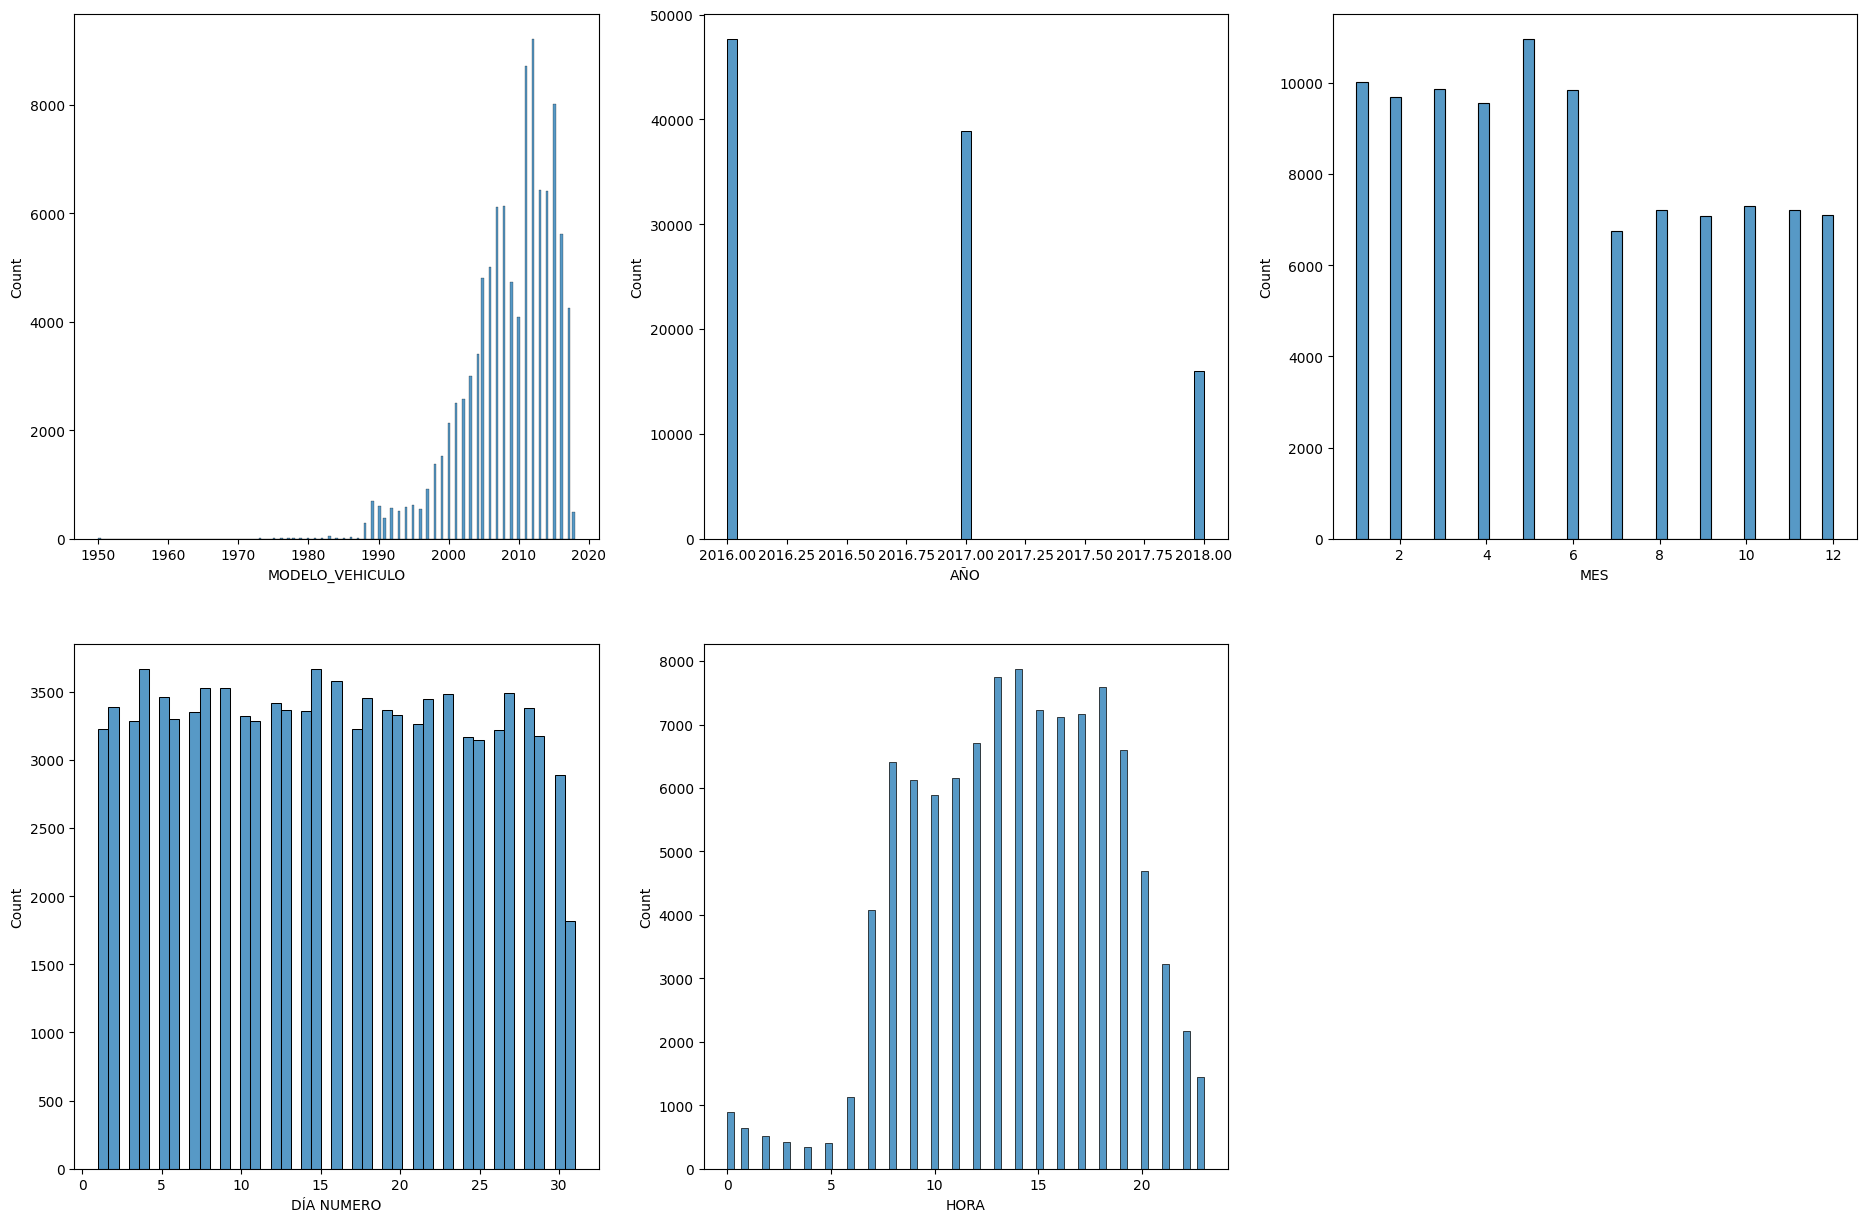

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(23, 15))
i, j = (0, 0)
for col in data_cuantitativa.columns:
  if col != 'FOLIO_ID':
    sns.histplot(data=data_cuantitativa[col], ax=axes[i,j])
    j += 1
    if j == 3:
      i += 1
      j = 0
axes[1,2].remove()

Los gráficos anteriores se pueden visualizar correctamente, pero utilizando una herramienta cómo Tableau o LookerStudio podemos mejorarlos.

<ipython-input-39-570cad1337e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_pearson = data_cuantitativa.corr(method='pearson')


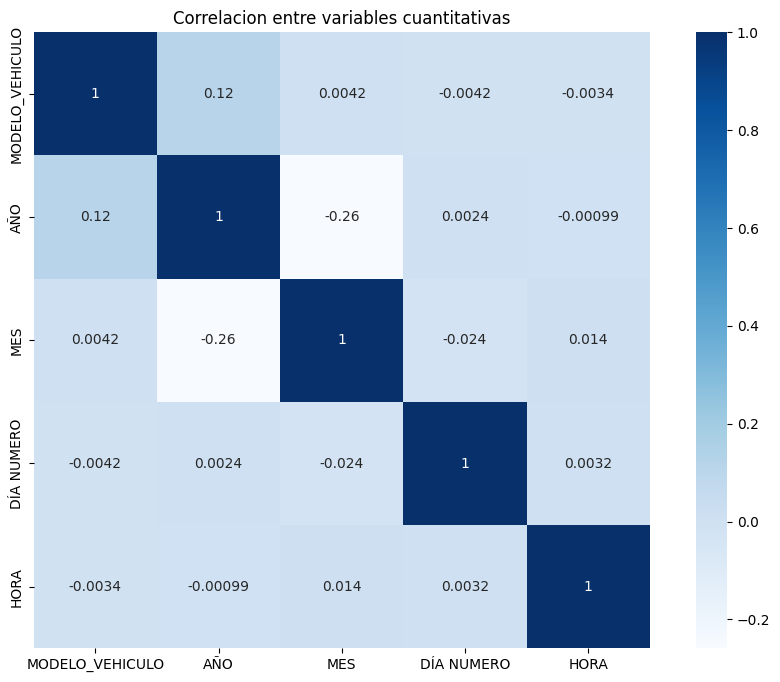

In [39]:
## Graficamos los correlaciones
corr_matrix_pearson = data_cuantitativa.corr(method='pearson')
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix_pearson, vmax=1, square=True, annot=True, cmap='Blues')
plt.title('Correlacion entre variables cuantitativas')
plt.show()